In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt   
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix

In [3]:
df=pd.read_csv("liedetector.csv")

In [4]:
df.head(5)

,X1,X2,X3,X4,X5,X6
0,P_001,3.6216,8.6661,-2.8073,-0.44699,0
1,P_002,4.5459,8.1674,-2.4586,-1.46210,0
2,P_003,3.8660,-2.6383,1.9242,0.10645,0
3,P_004,3.4566,9.5228,-4.0112,-3.59440,0
4,P_005,0.2323,-4.4552,4.5718,-0.98880,0


In [5]:
df.describe()

,X2,X3,X4,X5,X6
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433665,1.922353,1.397627,-1.191657,0.406706
std,2.842766,5.869047,4.310030,2.101013,0.491398
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 6 columns):
X1    1372 non-null object
X2    1372 non-null float64
X3    1372 non-null float64
X4    1372 non-null float64
X5    1372 non-null float64
X6    1372 non-null int64
dtypes: float64(4), int64(1), object(1)
memory usage: 64.4+ KB


In [13]:
df.drop('X1',1,inplace=True)

In [16]:
X=df.drop('X6',axis=1)
y=df['X6']

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=50)

In [22]:
model = LogisticRegression()
model.fit(X_train, y_train)

C:\Users\v2n\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [23]:
ytrain_predict = model.predict(X_train)
ytest_predict = model.predict(X_test)

In [24]:
ytest_predict_prob=model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.237025,0.762975
1,0.234894,0.765106
2,0.373354,0.626646
3,0.162482,0.837518
4,0.919125,0.080875


In [25]:
# Accuracy - Training Data
model.score(X_train, y_train)

0.85625

AUC: 0.869


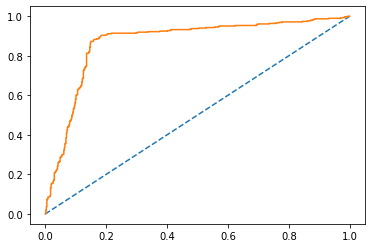

In [26]:
# predict probabilities
probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)

In [27]:
# Accuracy - Test Data
model.score(X_test, y_test)

0.8155339805825242

AUC: 0.869


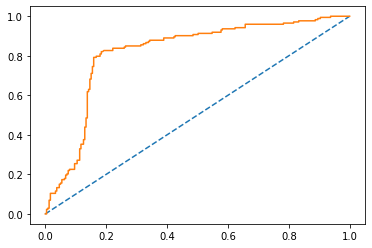

In [28]:
# predict probabilities
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)

In [34]:
confusion_matrix(y_train, ytrain_predict)

array([[484,  91],
       [ 47, 338]], dtype=int64)

In [30]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.91      0.84      0.88       575
           1       0.79      0.88      0.83       385

    accuracy                           0.86       960
   macro avg       0.85      0.86      0.85       960
weighted avg       0.86      0.86      0.86       960



In [53]:
cnf_matrix=confusion_matrix(y_test, ytest_predict)
print(cnf_matrix)

[[198  41]
 [ 35 138]]


In [48]:
tn, fp, fn, tp = metrics.confusion_matrix(y_train,ytrain_predict).ravel() 
print('# of True Positives is ',tp)

# of True Positives is  338


In [32]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84       239
           1       0.77      0.80      0.78       173

    accuracy                           0.82       412
   macro avg       0.81      0.81      0.81       412
weighted avg       0.82      0.82      0.82       412



In [33]:
#Test Data Accuracy
test_acc=model.score(X_test,y_test)
test_acc

0.8155339805825242

In [56]:
tn, fp, fn, tp = metrics.confusion_matrix(y_test,ytest_predict).ravel() 
print('# of True Positives is ',tp)

# of True Positives is  138


In [57]:
recall=tp/(tp+fn)

In [58]:
print(recall)

0.7976878612716763


In [59]:
fn

35